In [7]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('data/20230413_clb_taps.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,Device Code,Direction
0,2023-04-12 23:24:03+00:00,RT046205,Entry
1,2023-04-13 00:25:35+00:00,RT046205,Entry
2,2023-04-13 00:33:41+00:00,RT061806,Exit
3,2023-04-13 00:57:25+00:00,LBCTR,Entry
4,2023-04-13 00:57:43+00:00,RT046203,Entry
...,...,...,...
9641,2023-04-13 12:48:10+00:00,LBCTR,Exit
9642,2023-04-13 12:48:26+00:00,LBCTR,Exit
9643,2023-04-13 12:48:42+00:00,LBCTR,Exit
9644,2023-04-13 12:53:06+00:00,LBCTR,Exit


In [9]:
new_df = df.copy()
new_df['Entry'] = new_df['Direction'].replace({'Entry':1, 'Exit':-1})
new_df = new_df.sort_values('Datetime')
new_df['Occupancy'] = new_df['Entry'].cumsum()
new_df

,Datetime,Device Code,Direction,Entry,Occupancy
6053,2023-04-12 22:57:39+00:00,RT046205,Entry,1,1
4898,2023-04-12 23:21:44+00:00,RT046205,Entry,1,2
4899,2023-04-12 23:21:46+00:00,RT046203,Entry,1,3
0,2023-04-12 23:24:03+00:00,RT046205,Entry,1,4
2294,2023-04-12 23:30:41+00:00,RT046205,Entry,1,5
...,...,...,...,...,...
6052,2023-04-13 12:56:40+00:00,RT046204,Exit,-1,202
3445,2023-04-13 12:56:42+00:00,RT046206,Exit,-1,201
4897,2023-04-13 12:57:41+00:00,LBCTR,Exit,-1,200
8579,2023-04-13 12:57:59+00:00,RT046204,Exit,-1,199


<AxesSubplot: xlabel='Datetime', ylabel='Occupancy'>

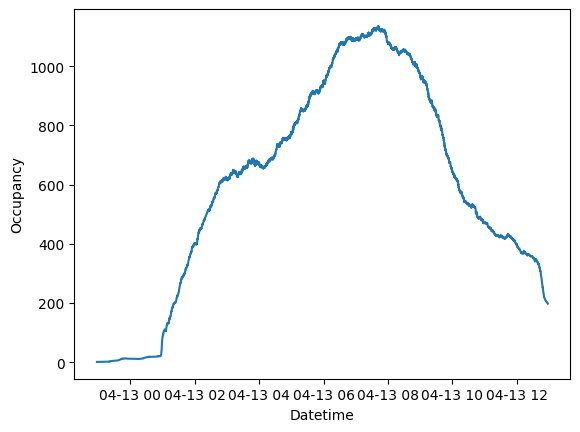

In [10]:
sns.lineplot(new_df, x='Datetime', y='Occupancy')

<AxesSubplot: xlabel='Datetime', ylabel='Count'>

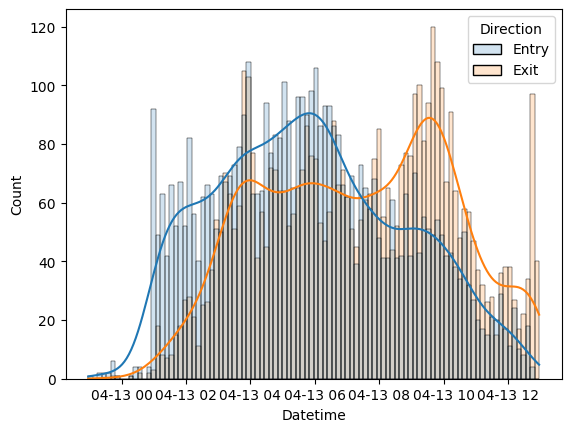

In [11]:
sns.histplot(df, x='Datetime', hue='Direction',bins=100,kde=True,alpha=0.2)

In [35]:
new_df = df.set_index('Datetime')
entry = new_df[new_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
exit = new_df[new_df['Direction']=='Exit']['Direction'].resample('10min',  label='left').count().reset_index()
entry_exit = pd.merge(
    entry,
    exit,
    how='outer',
    on='Datetime'
)
entry_exit.columns = ['Datetime', 'Entry', 'Exit']
entry_exit = entry_exit.fillna(0)
entry_exit

,Datetime,Entry,Exit
0,2023-04-12 22:50:00+00:00,1.0,0.0
1,2023-04-12 23:00:00+00:00,0.0,0.0
2,2023-04-12 23:10:00+00:00,0.0,0.0
3,2023-04-12 23:20:00+00:00,3.0,0.0
4,2023-04-12 23:30:00+00:00,3.0,0.0
...,...,...,...
80,2023-04-13 12:10:00+00:00,22.0,32.0
81,2023-04-13 12:20:00+00:00,13.0,17.0
82,2023-04-13 12:30:00+00:00,18.0,40.0
83,2023-04-13 12:40:00+00:00,7.0,107.0


<AxesSubplot: xlabel='Datetime', ylabel='Entry'>

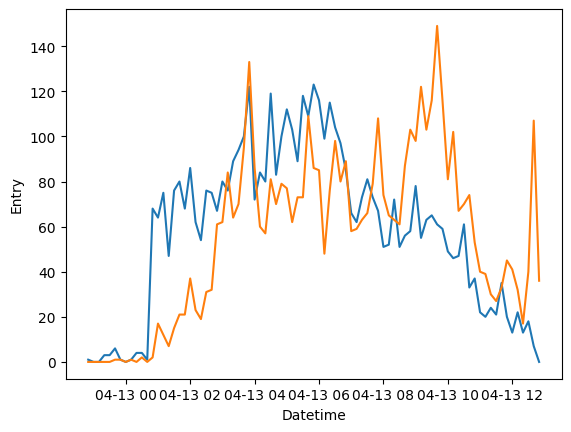

In [36]:
sns.lineplot(entry_exit, x='Datetime', y='Entry')
sns.lineplot(entry_exit, x='Datetime', y='Exit')

Possible things to measure:
- \# of hours studied (turnover), correlated with the levels they prefer to go to, e.g. level 6 low turnover but level 3 high turnover
    - depends on the time they come to library
    - depends on level they study
- preference for factors they take into account (rank/score importance 1-10)
- Seat hogging????